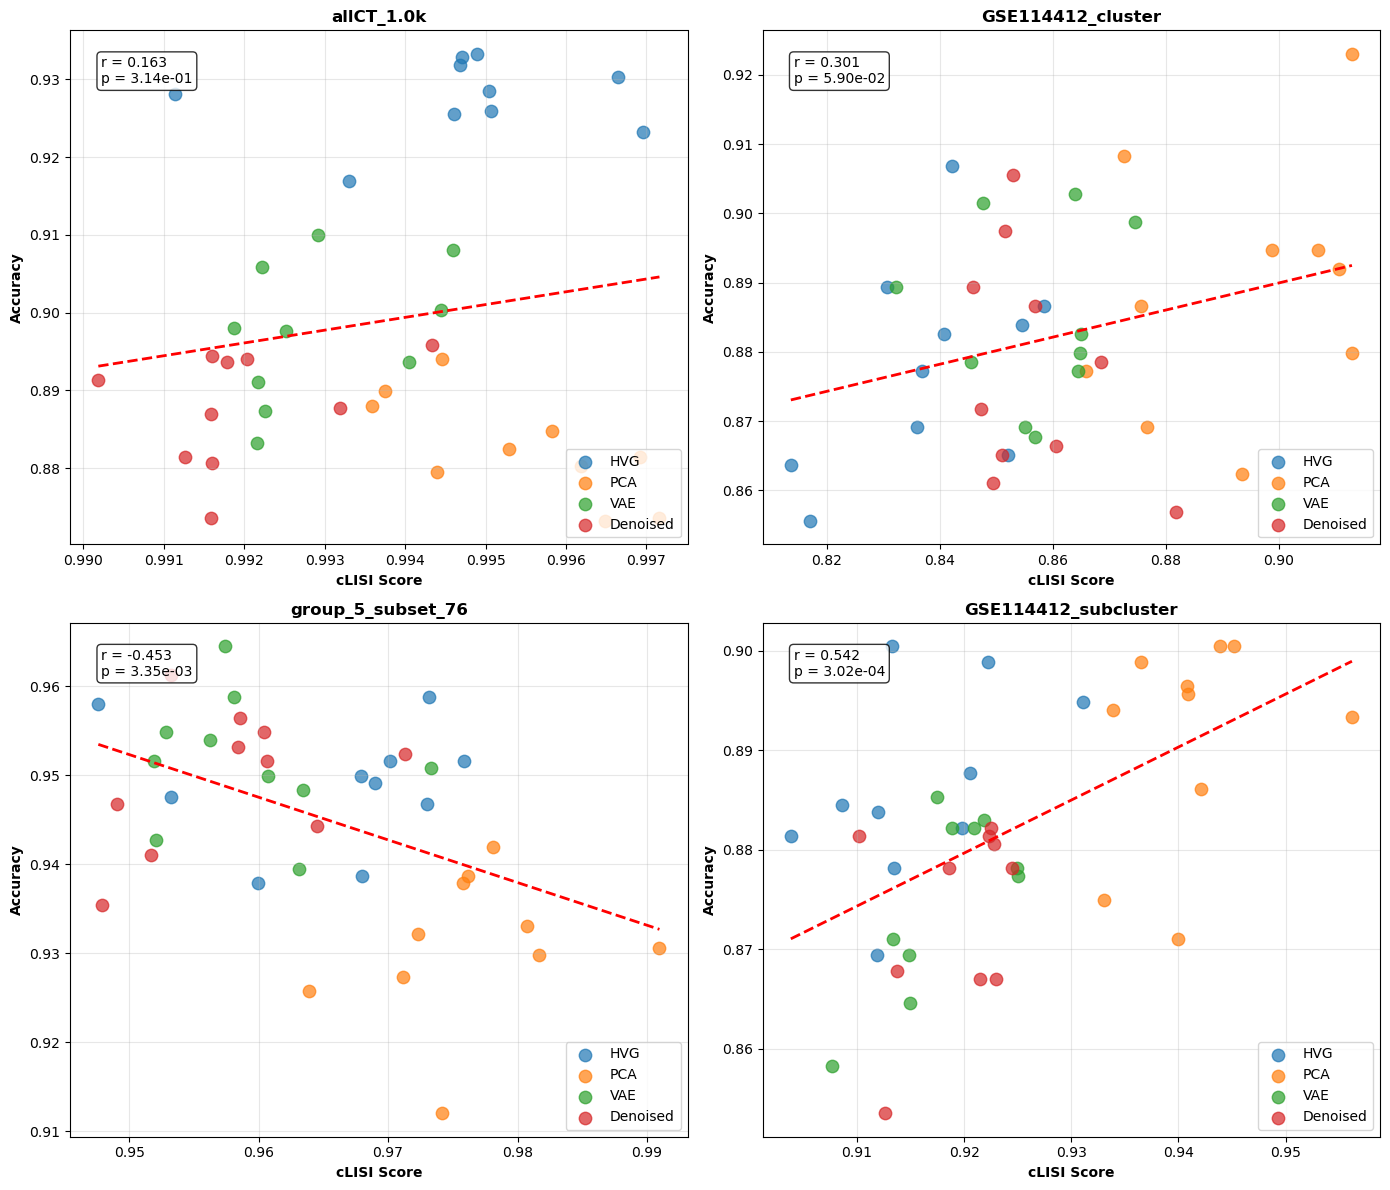

allCT_1.0k: r = 0.163, p = 3.14e-01
GSE114412_cluster: r = 0.301, p = 5.90e-02
group_5_subset_76: r = -0.453, p = 3.35e-03
GSE114412_subcluster: r = 0.542, p = 3.02e-04


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

# Read data
df1 = pd.read_csv('/novo/users/iwaq/multi/project_allCT_1.0k/results/multiple_run_allCT_1.0k_nruns_10.csv')
df2 = pd.read_csv('/novo/users/iwaq/multi/project_GSE114412_cluster/results/multiple_run_GSE114412_cluster_nruns_10.csv')
df3 = pd.read_csv('/novo/users/iwaq/multi/project_group_5_subset_76_ncells_7/results/multiple_run_group_5_subset_76_ncells_7_nruns_10.csv')
df4 = pd.read_csv('/novo/users/iwaq/multi/project_GSE114412_subcluster/results/multiple_run_GSE114412_subcluster_nruns_10.csv')

datasets = {
    'allCT_1.0k': df1,
    'GSE114412_cluster': df2,
    'group_5_subset_76': df3,
    'GSE114412_subcluster': df4
}

methods = ['HVG', 'PCA', 'VAE', 'Denoised']

# Create 2x2 plot
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

for idx, (dataset_name, df) in enumerate(datasets.items()):
    ax = axes[idx]
    
    all_x, all_y = [], []
    
    # Plot each method
    for method in methods:
        clisi_col = 'clisi_raw' if method == 'HVG' else f'clisi_{method.lower()}'
        acc_col = 'lt_hvg_test_acc' if method == 'HVG' else f'lt_{method.lower()}_test_acc'
        
        x = df[clisi_col].dropna()
        y = df[acc_col].dropna()
        
        ax.scatter(x, y, label=method, alpha=0.7, s=80)
        all_x.extend(x)
        all_y.extend(y)
    
    # Regression line
    all_x = np.array(all_x)
    all_y = np.array(all_y)
    z = np.polyfit(all_x, all_y, 1)
    p = np.poly1d(z)
    x_line = np.linspace(all_x.min(), all_x.max(), 100)
    ax.plot(x_line, p(x_line), "r--", linewidth=2)
    
    # Correlation
    r, pval = pearsonr(all_x, all_y)
    ax.text(0.05, 0.95, f'r = {r:.3f}\np = {pval:.2e}', 
            transform=ax.transAxes, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    ax.set_xlabel('cLISI Score', fontweight='bold')
    ax.set_ylabel('Accuracy', fontweight='bold')
    ax.set_title(dataset_name, fontweight='bold')
    ax.legend(loc='lower right')
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('/novo/users/iwaq/figures/clisi_vs_accuracy_correlation_bydataset.png', dpi=300, bbox_inches='tight')
plt.show()

# Print correlations
for dataset_name, df in datasets.items():
    all_x, all_y = [], []
    for method in methods:
        clisi_col = 'clisi_raw' if method == 'HVG' else f'clisi_{method.lower()}'
        acc_col = 'lt_hvg_test_acc' if method == 'HVG' else f'lt_{method.lower()}_test_acc'
        all_x.extend(df[clisi_col].dropna())
        all_y.extend(df[acc_col].dropna())
    
    r, pval = pearsonr(all_x, all_y)
    print(f"{dataset_name}: r = {r:.3f}, p = {pval:.2e}")

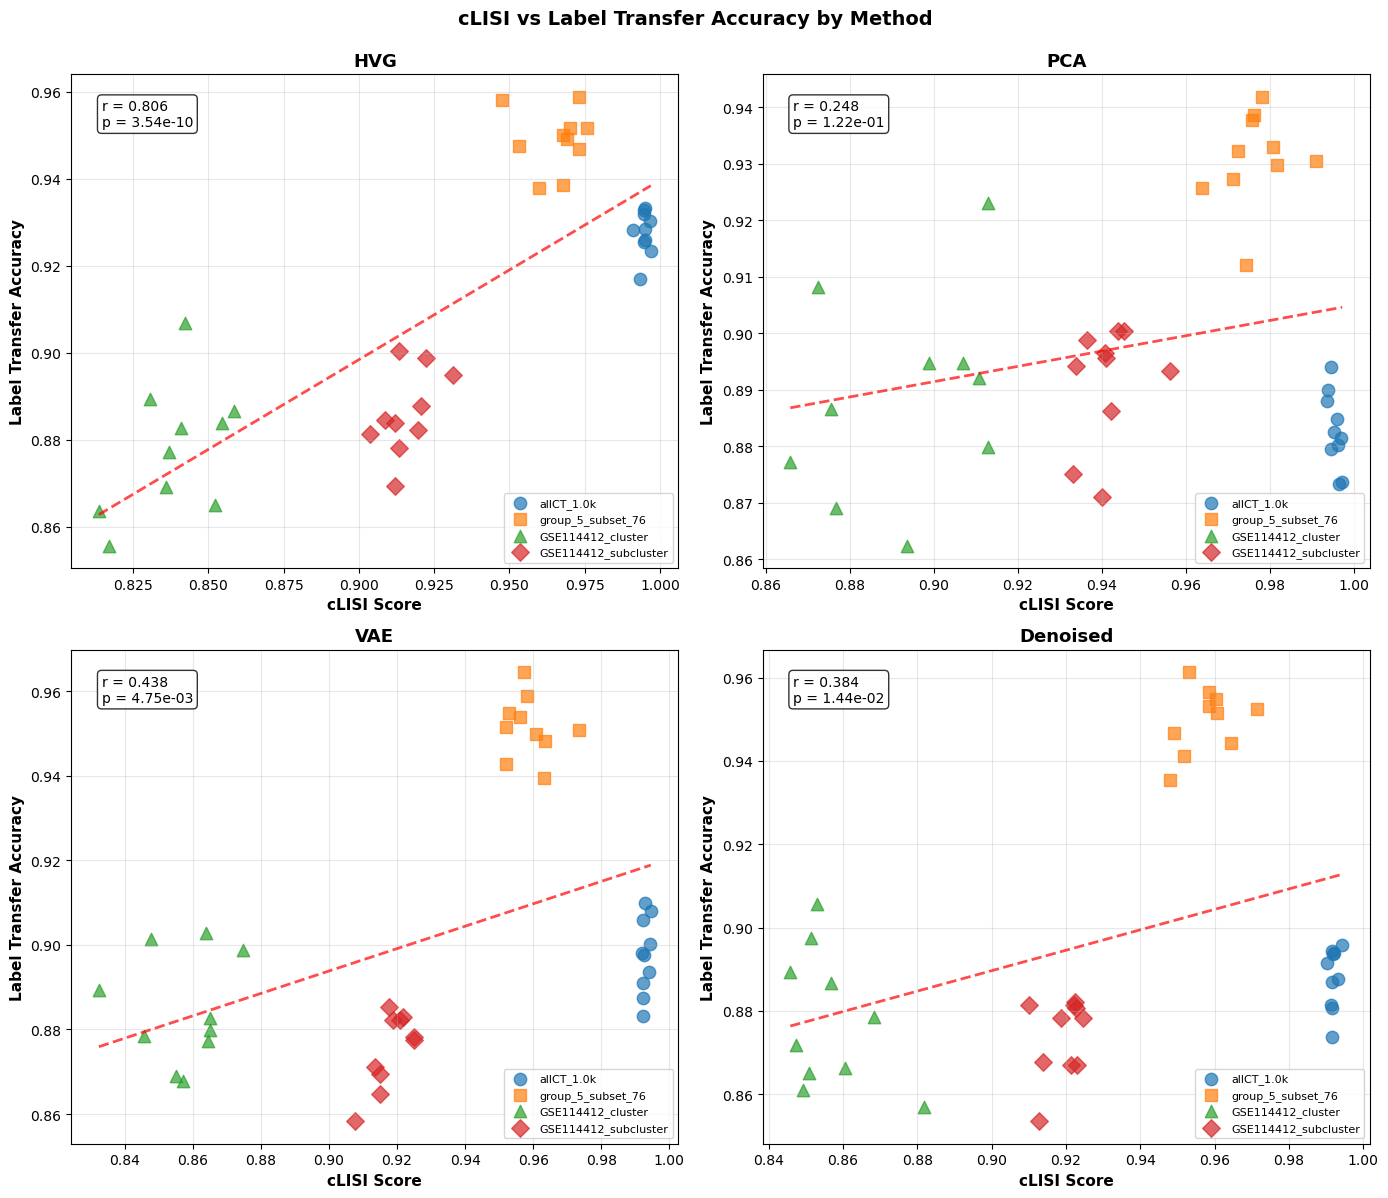


Correlations by Method (across all datasets):
HVG       : r = 0.806, p = 3.54e-10
PCA       : r = 0.248, p = 1.22e-01
VAE       : r = 0.438, p = 4.75e-03
Denoised  : r = 0.384, p = 1.44e-02

Correlations by Dataset (across all methods):
allCT_1.0k          : r = 0.163, p = 3.14e-01
group_5_subset_76   : r = -0.453, p = 3.35e-03
GSE114412_cluster   : r = 0.301, p = 5.90e-02
GSE114412_subcluster: r = 0.542, p = 3.02e-04


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

# Read data
df1 = pd.read_csv('/novo/users/iwaq/multi/project_allCT_1.0k/results/multiple_run_allCT_1.0k_nruns_10.csv')
df2 = pd.read_csv('/novo/users/iwaq/multi/project_GSE114412_cluster/results/multiple_run_GSE114412_cluster_nruns_10.csv')
df3 = pd.read_csv('/novo/users/iwaq/multi/project_group_5_subset_76_ncells_7/results/multiple_run_group_5_subset_76_ncells_7_nruns_10.csv')
df4 = pd.read_csv('/novo/users/iwaq/multi/project_GSE114412_subcluster/results/multiple_run_GSE114412_subcluster_nruns_10.csv')

datasets = {
    'allCT_1.0k': df1,
    'group_5_subset_76': df3,
    'GSE114412_cluster': df2,
    'GSE114412_subcluster': df4
}

methods = ['HVG', 'PCA', 'VAE', 'Denoised']

# Create 2x2 plot - one plot per method
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

# Color palette for datasets
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
markers = ['o', 's', '^', 'D']

for idx, method in enumerate(methods):
    ax = axes[idx]
    all_x, all_y = [], []
    
    # Plot each dataset
    for (dataset_name, df), color, marker in zip(datasets.items(), colors, markers):
        clisi_col = 'clisi_raw' if method == 'HVG' else f'clisi_{method.lower()}'
        acc_col = 'lt_hvg_test_acc' if method == 'HVG' else f'lt_{method.lower()}_test_acc'
        
        x = df[clisi_col].dropna()
        y = df[acc_col].dropna()
        
        ax.scatter(x, y, label=dataset_name, alpha=0.7, s=80, color=color, marker=marker)
        
        all_x.extend(x)
        all_y.extend(y)
    
    # Regression line
    all_x = np.array(all_x)
    all_y = np.array(all_y)
    z = np.polyfit(all_x, all_y, 1)
    p = np.poly1d(z)
    x_line = np.linspace(all_x.min(), all_x.max(), 100)
    ax.plot(x_line, p(x_line), "r--", linewidth=2, alpha=0.7)
    
    # Correlation
    r, pval = pearsonr(all_x, all_y)
    ax.text(0.05, 0.95, f'r = {r:.3f}\np = {pval:.2e}',
            transform=ax.transAxes, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
            fontsize=10)
    
    ax.set_xlabel('cLISI Score', fontweight='bold', fontsize=11)
    ax.set_ylabel('Label Transfer Accuracy', fontweight='bold', fontsize=11)
    ax.set_title(f'{method}', fontweight='bold', fontsize=13)
    ax.legend(loc='lower right', fontsize=8)
    ax.grid(alpha=0.3)

plt.suptitle('cLISI vs Label Transfer Accuracy by Method', 
             fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('/novo/users/iwaq/figures/clisi_vs_accuracy_correlation_by_method.png', dpi=300, bbox_inches='tight')
plt.show()

# Print correlations per method
print("\nCorrelations by Method (across all datasets):")
print("="*60)
for method in methods:
    all_x, all_y = [], []
    for dataset_name, df in datasets.items():
        clisi_col = 'clisi_raw' if method == 'HVG' else f'clisi_{method.lower()}'
        acc_col = 'lt_hvg_test_acc' if method == 'HVG' else f'lt_{method.lower()}_test_acc'
        all_x.extend(df[clisi_col].dropna())
        all_y.extend(df[acc_col].dropna())
    
    r, pval = pearsonr(all_x, all_y)
    print(f"{method:10s}: r = {r:.3f}, p = {pval:.2e}")

# Print correlations per dataset (for comparison)
print("\nCorrelations by Dataset (across all methods):")
print("="*60)
for dataset_name, df in datasets.items():
    all_x, all_y = [], []
    for method in methods:
        clisi_col = 'clisi_raw' if method == 'HVG' else f'clisi_{method.lower()}'
        acc_col = 'lt_hvg_test_acc' if method == 'HVG' else f'lt_{method.lower()}_test_acc'
        all_x.extend(df[clisi_col].dropna())
        all_y.extend(df[acc_col].dropna())
    
    r, pval = pearsonr(all_x, all_y)
    print(f"{dataset_name:20s}: r = {r:.3f}, p = {pval:.2e}")

In [6]:
# Count agreement on best method
agreement_counts = {'exact_match': 0, 'within_1': 0, 'total': 0}

for dataset_name, df in datasets.items():
    for run_idx in range(len(df)):
        clisi_scores = {
            'HVG': df.loc[run_idx, 'clisi_raw'],
            'PCA': df.loc[run_idx, 'clisi_pca'],
            'VAE': df.loc[run_idx, 'clisi_vae'],
            'Denoised': df.loc[run_idx, 'clisi_denoised']
        }
        
        acc_scores = {
            'HVG': df.loc[run_idx, 'lt_hvg_test_acc'],
            'PCA': df.loc[run_idx, 'lt_pca_test_acc'],
            'VAE': df.loc[run_idx, 'lt_vae_test_acc'],
            'Denoised': df.loc[run_idx, 'lt_denoised_test_acc']
        }
        
        best_clisi = max(clisi_scores, key=clisi_scores.get)
        best_acc = max(acc_scores, key=acc_scores.get)
        
        clisi_rank = sorted(clisi_scores, key=clisi_scores.get, reverse=True).index(best_acc) + 1
        
        if best_clisi == best_acc:
            agreement_counts['exact_match'] += 1
        
        if clisi_rank <= 2:  # Best or second-best
            agreement_counts['within_1'] += 1
        
        agreement_counts['total'] += 1

print(f"\nBest Method Agreement:")
print(f"Exact match: {agreement_counts['exact_match']}/{agreement_counts['total']} "
      f"({100*agreement_counts['exact_match']/agreement_counts['total']:.1f}%)")
print(f"Within top 2: {agreement_counts['within_1']}/{agreement_counts['total']} "
      f"({100*agreement_counts['within_1']/agreement_counts['total']:.1f}%)")


Best Method Agreement:
Exact match: 16/40 (40.0%)
Within top 2: 26/40 (65.0%)
